# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [ ]:

# This dataset represents 17 marketing campaigns that occured between May 2008 and November 2010


### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
import time

In [ ]:
bank = pd.read_csv('/content/sample_data/bank-additional-full.csv', sep = ';') # reads CSV file 

In [ ]:
bank.head() # displays 5 first entries

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [ ]:
# features 1-7, 14 & 20 need to be changed from object to integer or float

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
# once object features are transformed we need to compare the performance of different classifiers

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [ ]:
X = bank.drop(columns=['y'])    # Removed the y column
X = pd.get_dummies(X)           # encoded all non numerical features

In [ ]:
y = bank['y'].replace('yes',1)  # took the last feature from the dataset and
y = y.replace('no',0)           # replaced yes and no with 1 and 0

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True) 
# break up dataset into training and testing

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [ ]:
# our baseline model should be a defualt logistic regression model

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [ ]:
st = time.time()  # starts timer

Log_Reg = Pipeline([('scaler', StandardScaler()), ('Log_Reg', LogisticRegression())]) 
                  # pipeline normalizes data then applies logistic regression
Log_Reg.fit(X_train,y_train)

f = time.time()    # marks end time
LR_trainTime = f - st # calculates total processing time

### Problem 9: Score the Model

What is the accuracy of your model?

In [ ]:
LR_train_sc = Log_Reg.score(X_train,y_train) # uses train data to provide accuracy of the model
LR_test_sc = Log_Reg.score(X_test,y_test) # uses test data to provide accuracy of the model

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [ ]:
st = time.time()  # starts timer
KNN = Pipeline([('scaler', StandardScaler()), ('KNN', KNeighborsClassifier())]) 
                  # pipeline normalizes data then applies KNeighbors
KNN.fit(X_train,y_train)

f = time.time()    # marks end time
KNN_trainTime = f - st # calculates total processing time

KNN_train_sc = KNN.score(X_train,y_train) # uses train data to provide accuracy of the model
KNN_test_sc = KNN.score(X_test,y_test) # uses test data to provide accuracy of the model

In [ ]:
st = time.time()  # starts timer
DT = Pipeline([('scaler', StandardScaler()), ('DT', DecisionTreeClassifier())]) 
                  # pipeline normalizes data then applies KNeighbors
DT.fit(X_train,y_train)

f = time.time()    # marks end time
DT_trainTime = f - st # calculates total processing time

DT_train_sc = DT.score(X_train,y_train) # uses train data to provide accuracy of the model
DT_test_sc = DT.score(X_test,y_test) # uses test data to provide accuracy of the model

In [ ]:
st = time.time()  # starts timer
SVM = Pipeline([('scaler', StandardScaler()), ('SVM', svm.SVC())]) 
                  # pipeline normalizes data then applies KNeighbors
SVM.fit(X_train,y_train)

f = time.time()    # marks end time
SVM_trainTime = f - st # calculates total processing time

SVM_train_sc = SVM.score(X_train,y_train) # uses train data to provide accuracy of the model
SVM_test_sc = SVM.score(X_test,y_test) # uses test data to provide accuracy of the model

In [ ]:
d = {'Model': ['Logistic Regression', 'KNN','Decision Tree','SVM'],       
     'Train Time': [LR_trainTime, KNN_trainTime, DT_trainTime, SVM_trainTime], 
     "Train Accuracy":[LR_train_sc, KNN_train_sc, DT_train_sc, SVM_train_sc], 
     'Test Accuracy':[LR_test_sc, KNN_test_sc, DT_test_sc, SVM_test_sc]}
df = pd.DataFrame(data=d)
df      # this section of code groups together relevant data and displays dataframe

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.605649,0.913567,0.905215
1,KNN,0.098180,0.921304,0.888997
2,Decision Tree,0.342050,1.000000,0.889677
3,SVM,33.568372,0.929818,0.902302


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [ ]:
# I dont think we have to remove features to gain performance

In [ ]:
LR = Pipeline([('scaler', StandardScaler()), (['PCA', PCA()]), ('LR', LogisticRegression())]) 
# setup a new pipeline with PCA because we have alot of features. PCA will help get rid of some.
n_components = list(range(10,20,1))     # set a range of PCA components from 10 to 20 to be tested
C = np.logspace(-4, 4, 20)              # set a range for C
penalty = ['l1', 'l2']                  # both L1 and L2 regularlization are used to determine best performance parameters
parameters = dict(PCA__n_components= n_components, LR__C=C, LR__penalty=penalty)

GS = GridSearchCV(LR, parameters)   #establish gridsearch
GS.fit(X_train, y_train)  # run fitting process on training data        

GS.best_params_ # displays best parameters

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1000 fits failed out of a total of 2000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1000 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)

{'LR__C': 0.0006951927961775605, 'LR__penalty': 'l2', 'PCA__n_components': 13}

In [ ]:
# using the best parameters we train the model again and find our accuracy score
LR = Pipeline([('scaler', StandardScaler()), (['PCA', PCA(n_components=13)]), ('LR', LogisticRegression(penalty='l2',C=0.00069519))]) 
LR.fit(X_train, y_train)
LR_train_sc = LR.score(X_train, y_train)
LR_test_sc = LR.score(X_test, y_test)

In [ ]:
# Trying to determine best parameters for knn
KNN = Pipeline([('scaler', StandardScaler()), (['PCA', PCA()]), ('knn', KNeighborsClassifier())]) 
#initialize pipeline
n_components = list(range(10,20,1))   #
weights=['uniform','distance']        # set of hyperparameters to check
metric=['euclidean','manhattan']      #
parameters = dict(PCA__n_components= n_components,    #
                    knn__weights=weights,             # format to save testing values
                    knn__metric=metric)               #

GS = GridSearchCV(KNN, parameters)      # initialize gridsearch with model and parameters
GS.fit(X_train, y_train)      # fit the training data
GS.best_params_     # display best parameters

{'PCA__n_components': 13,
 'knn__metric': 'manhattan',
 'knn__weights': 'uniform'}

In [ ]:
# after determing best parameters we apply them and find the accuracy
KNN = Pipeline([('scaler', StandardScaler()), (['PCA', PCA(n_components=13)]), ('knn', KNeighborsClassifier(weights='uniform', metric='manhattan'))]) 
KNN.fit(X_train, y_train)       # fit trainning data 
KNN_train_sc = KNN.score(X_train, y_train)    # 
KNN_test_sc = KNN.score(X_test, y_test)       # find accuracy of model

In [ ]:
# determine best parameters for Decision tree classifier
DT = Pipeline([('scaler', StandardScaler()), (['PCA', PCA()]), ('dt', DecisionTreeClassifier())]) 
n_components = list(range(10,20,1))     #
criterion = ['gini','entropy']          #
max_depth = range(1,4)                  #   setup hyperparameters to check
min_split = range(1,4)                  #
min_leaf = range(1,3)                   #
parameters = dict(PCA__n_components= n_components,          #
                    dt__criterion=criterion,                #
                    dt__max_depth=max_depth,                #   format to save testing values
                    dt__min_samples_split = min_split,      #
                    dt__min_samples_leaf= min_leaf)         #

GS = GridSearchCV(DT, parameters)   # initialize gridsearch
GS.fit(X_train, y_train)      # fit training data
GS.best_params_   # display best parameters

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
600 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
600 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-package

{'PCA__n_components': 19,
 'dt__criterion': 'gini',
 'dt__max_depth': 3,
 'dt__min_samples_leaf': 1,
 'dt__min_samples_split': 2}

In [ ]:
# using best parameters find accuracy score for decision tree classifier
DT = Pipeline([('scaler', StandardScaler()), (['PCA', PCA(n_components=19)]), ('dt', DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=1, min_samples_split=2))]) 
DT.fit(X_train, y_train)    # run fit on training data
DT_train_sc = DT.score(X_train, y_train)    #
DT_test_sc = DT.score(X_test, y_test)       # find accuracy scores

In [ ]:
# SVM gridsearch to find best parameters
SVC = Pipeline([('scaler', StandardScaler()), (['PCA', PCA()]), ('SVM', svm.SVC())]) 

parameters = dict(PCA__n_components= [15],                    #
                  SVM__C =  [0.1, 1, 10, 100, 1000],          # parameter format
                  SVM__gamma = [1, 0.1, 0.01, 0.001, 0.0001]) #
                  #SVM__kernel = ['rbf'])

GS = GridSearchCV(SVC, parameters)    # gridsearch initialization
GS.fit(X_train, y_train)      # fit training data to model
GS.best_params_           # return best parameters

In [ ]:
#
# 
# SVC gridsearch could not converge. It kept running for more than 4 hrs and seemed to get stuck.
#
#

In [ ]:
# using best parameters we find best accuracy score
SVC = Pipeline([('scaler', StandardScaler()), (['PCA', PCA(n_components=16)]), ('SVM', svm.SVC())]) # initialize pipeline
SVC.fit(X_train, y_train)   # fit training data
SVC_train_sc = SVC.score(X_train, y_train)  #
SVC_test_sc = SVC.score(X_test, y_test)     # find accuracies

In [ ]:
d = {'Model': ['Logistic Regression', 'KNN','Decision Tree','SVM'],       
     'Train Time': ['9 minutes', '7 minutes', '11 minutes', 'N/A'], 
     "Train Accuracy":[LR_train_sc, KNN_train_sc, DT_train_sc, 'N/A'], 
     'Test Accuracy':[LR_test_sc, KNN_test_sc, DT_test_sc, 'N/A']}
df_gridsearch = pd.DataFrame(data=d)
df_gridsearch      # this section of code groups together relevant data and displays dataframe

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,9 minutes,0.900521,0.891425
1,KNN,7 minutes,0.913891,0.885598
2,Decision Tree,11 minutes,0.900877,0.890939
3,SVM,N/A,0.929818,0.902302


In [ ]:
# models with default settings
df

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.605649,0.913567,0.905215
1,KNN,0.098180,0.921304,0.888997
2,Decision Tree,0.342050,1.000000,0.889677
3,SVM,33.568372,0.929818,0.902302


In [ ]:
# Comparing both default and gridsearched models we can see that we got slightly better results from the grid search. 
# Given this we can see that the Logistic Regression model performed better than the rest in accuracy.
# So we will dive deeper into that model to see how well it performs.

In [ ]:
from sklearn.metrics import classification_report
prediction = LR.predict(X_test)                         # uses testing set to give predictions
print(classification_report(y_test, prediction))         # find true and false positives and calculates them into precision and recall

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      9076
           1       0.66      0.18      0.28      1221

    accuracy                           0.89     10297
   macro avg       0.78      0.58      0.61     10297
weighted avg       0.87      0.89      0.86     10297



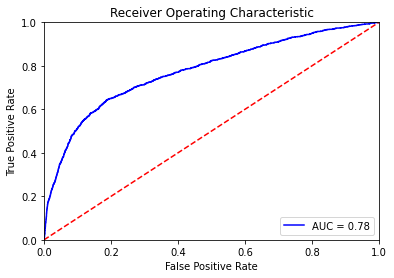

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, auc
probs = LR.predict_proba(X_test)                      #
preds = probs[:,1]                                    # step to get ROC curve 
fpr, tpr, thresholds = roc_curve(y_test, preds)       #
roc_auc = auc(fpr, tpr)                               #

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


# So far we can see that the model performed OK
# It seemed like it could have performed better
# The closer the blue line gets to the top left corner
# the better the model can represent the data.